In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('dataset_Facebook.csv')

In [5]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,comment,like,share,Total Interactions
0,139441,Photo,2,12,4.0,3,0.0,2752.0,4.0,79.0,17.0,100
1,139441,Status,2,12,3.0,10,0.0,10460.0,5.0,130.0,29.0,164
2,139441,Photo,3,12,3.0,3,0.0,2413.0,0.0,66.0,14.0,80
3,139441,Photo,2,12,2.0,10,1.0,50128.0,58.0,1572.0,147.0,1777
4,139441,Photo,2,12,2.0,3,0.0,7244.0,19.0,325.0,49.0,393


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page total likes           500 non-null    int64  
 1   Type                       496 non-null    object 
 2   Category                   500 non-null    int64  
 3   Post Month                 500 non-null    int64  
 4   Post Weekday               496 non-null    float64
 5   Post Hour                  500 non-null    int64  
 6   Paid                       497 non-null    float64
 7   Lifetime Post Total Reach  496 non-null    float64
 8   comment                    497 non-null    float64
 9   like                       499 non-null    float64
 10  share                      486 non-null    float64
 11  Total Interactions         500 non-null    int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [7]:
df = df.drop(['Type'], axis=1)

In [8]:
df = df[~df['Post Weekday'].isnull()]
df = df[~df['Paid'].isnull()]
df = df[~df['Lifetime Post Total Reach'].isnull()]
df = df[~df['comment'].isnull()]
df = df[~df['like'].isnull()]
df = df[~df['share'].isnull()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 498
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page total likes           475 non-null    int64  
 1   Category                   475 non-null    int64  
 2   Post Month                 475 non-null    int64  
 3   Post Weekday               475 non-null    float64
 4   Post Hour                  475 non-null    int64  
 5   Paid                       475 non-null    float64
 6   Lifetime Post Total Reach  475 non-null    float64
 7   comment                    475 non-null    float64
 8   like                       475 non-null    float64
 9   share                      475 non-null    float64
 10  Total Interactions         475 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 44.5 KB


In [10]:
y = df['Paid']
df = df.drop('Paid', axis=1)

In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, f1_score

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()                    
model.fit(X_train, y_train)                         
predict = model.predict(X_test)                     

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.3333333333333333
recall 0.125
accuracy 0.7133757961783439
f1 0.18181818181818182


In [16]:
model = RandomForestClassifier(n_estimators=2000)
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.4117647058823529
recall 0.175
accuracy 0.7261146496815286
f1 0.2456140350877193


In [17]:
predict_proba = model.predict_proba(X_test)
predict_proba

array([[0.371 , 0.629 ],
       [0.6465, 0.3535],
       [0.778 , 0.222 ],
       [0.8985, 0.1015],
       [0.5205, 0.4795],
       [0.71  , 0.29  ],
       [0.4625, 0.5375],
       [0.315 , 0.685 ],
       [0.738 , 0.262 ],
       [0.58  , 0.42  ],
       [0.7295, 0.2705],
       [0.814 , 0.186 ],
       [0.59  , 0.41  ],
       [0.488 , 0.512 ],
       [0.8195, 0.1805],
       [0.8425, 0.1575],
       [0.612 , 0.388 ],
       [0.776 , 0.224 ],
       [0.5695, 0.4305],
       [0.714 , 0.286 ],
       [0.763 , 0.237 ],
       [0.7085, 0.2915],
       [0.6795, 0.3205],
       [0.8905, 0.1095],
       [0.7195, 0.2805],
       [0.756 , 0.244 ],
       [0.51  , 0.49  ],
       [0.8135, 0.1865],
       [0.758 , 0.242 ],
       [0.625 , 0.375 ],
       [0.7455, 0.2545],
       [0.5295, 0.4705],
       [0.7175, 0.2825],
       [0.813 , 0.187 ],
       [0.703 , 0.297 ],
       [0.733 , 0.267 ],
       [0.8755, 0.1245],
       [0.5485, 0.4515],
       [0.719 , 0.281 ],
       [0.736 , 0.264 ],


In [18]:
predict_proba[:,1]

array([0.629 , 0.3535, 0.222 , 0.1015, 0.4795, 0.29  , 0.5375, 0.685 ,
       0.262 , 0.42  , 0.2705, 0.186 , 0.41  , 0.512 , 0.1805, 0.1575,
       0.388 , 0.224 , 0.4305, 0.286 , 0.237 , 0.2915, 0.3205, 0.1095,
       0.2805, 0.244 , 0.49  , 0.1865, 0.242 , 0.375 , 0.2545, 0.4705,
       0.2825, 0.187 , 0.297 , 0.267 , 0.1245, 0.4515, 0.281 , 0.264 ,
       0.219 , 0.254 , 0.403 , 0.582 , 0.381 , 0.485 , 0.3875, 0.2155,
       0.4195, 0.602 , 0.3185, 0.138 , 0.2325, 0.5915, 0.2145, 0.3825,
       0.2215, 0.3675, 0.4305, 0.342 , 0.2595, 0.3695, 0.2435, 0.157 ,
       0.4365, 0.2915, 0.1625, 0.4785, 0.4265, 0.2095, 0.27  , 0.4575,
       0.239 , 0.345 , 0.251 , 0.304 , 0.237 , 0.2725, 0.426 , 0.5205,
       0.531 , 0.1865, 0.3   , 0.4405, 0.543 , 0.222 , 0.111 , 0.3015,
       0.3745, 0.3535, 0.1505, 0.2345, 0.3405, 0.2045, 0.269 , 0.2925,
       0.415 , 0.2905, 0.172 , 0.315 , 0.416 , 0.386 , 0.577 , 0.2015,
       0.3225, 0.473 , 0.154 , 0.198 , 0.3105, 0.2355, 0.1125, 0.551 ,
      

In [19]:
import random
tmp = [
    random.random()
    for _ in range (len(predict_proba[:1]))
]

(-0.01, 1.01)

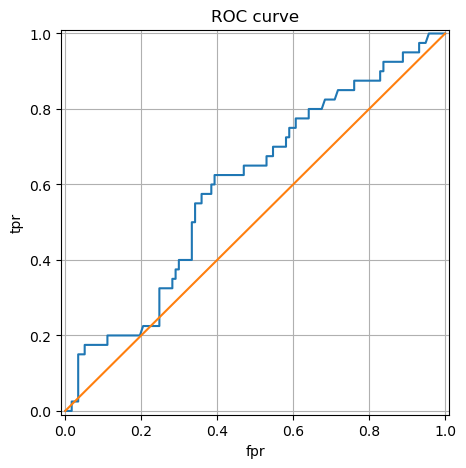

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [21]:
roc_auc_score(y_test, predict_proba[:,1])

0.5967948717948718

In [22]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.68802521, 0.59663866, 0.17226891, 0.39810924, 0.33718487,
       0.51244344, 0.40158371, 0.31221719, 0.260181  , 0.34049774])

Обработаем ещё раз и получим лучший результат при обучении модели

In [26]:
df = pd.read_csv('dataset_Facebook.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page total likes           500 non-null    int64  
 1   Type                       496 non-null    object 
 2   Category                   500 non-null    int64  
 3   Post Month                 500 non-null    int64  
 4   Post Weekday               496 non-null    float64
 5   Post Hour                  500 non-null    int64  
 6   Paid                       497 non-null    float64
 7   Lifetime Post Total Reach  496 non-null    float64
 8   comment                    497 non-null    float64
 9   like                       499 non-null    float64
 10  share                      486 non-null    float64
 11  Total Interactions         500 non-null    int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [27]:
df = df.drop(['Type'], axis=1)

In [29]:
df.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,comment,like,share,Total Interactions
0,139441,2,12,4.0,3,0.0,2752.0,4.0,79.0,17.0,100
1,139441,2,12,3.0,10,0.0,10460.0,5.0,130.0,29.0,164
2,139441,3,12,3.0,3,0.0,2413.0,0.0,66.0,14.0,80
3,139441,2,12,2.0,10,1.0,50128.0,58.0,1572.0,147.0,1777
4,139441,2,12,2.0,3,0.0,7244.0,19.0,325.0,49.0,393


In [30]:
df = pd.get_dummies(df, columns=['Category', 'Post Weekday'])

In [31]:
df.head()

,Page total likes,Post Month,Post Hour,Paid,Lifetime Post Total Reach,comment,like,share,Total Interactions,Category_1,Category_2,Category_3,Post Weekday_1.0,Post Weekday_2.0,Post Weekday_3.0,Post Weekday_4.0,Post Weekday_5.0,Post Weekday_6.0,Post Weekday_7.0
0,139441,12,3,0.0,2752.0,4.0,79.0,17.0,100,False,True,False,False,False,False,True,False,False,False
1,139441,12,10,0.0,10460.0,5.0,130.0,29.0,164,False,True,False,False,False,True,False,False,False,False
2,139441,12,3,0.0,2413.0,0.0,66.0,14.0,80,False,False,True,False,False,True,False,False,False,False
3,139441,12,10,1.0,50128.0,58.0,1572.0,147.0,1777,False,True,False,False,True,False,False,False,False,False
4,139441,12,3,0.0,7244.0,19.0,325.0,49.0,393,False,True,False,False,True,False,False,False,False,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page total likes           500 non-null    int64  
 1   Post Month                 500 non-null    int64  
 2   Post Hour                  500 non-null    int64  
 3   Paid                       497 non-null    float64
 4   Lifetime Post Total Reach  496 non-null    float64
 5   comment                    497 non-null    float64
 6   like                       499 non-null    float64
 7   share                      486 non-null    float64
 8   Total Interactions         500 non-null    int64  
 9   Category_1                 500 non-null    bool   
 10  Category_2                 500 non-null    bool   
 11  Category_3                 500 non-null    bool   
 12  Post Weekday_1.0           500 non-null    bool   
 13  Post Weekday_2.0           500 non-null    bool   

In [33]:
df.loc[df['Lifetime Post Total Reach'].isnull(), 'Lifetime Post Total Reach'] = df['Lifetime Post Total Reach'].median()
df.loc[df['Paid'].isnull(), 'Paid'] = df['Paid'].median()
df.loc[df['comment'].isnull(), 'comment'] = df['comment'].median()
df.loc[df['like'].isnull(), 'like'] = df['like'].median()
df.loc[df['share'].isnull(), 'share'] = df['share'].median()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page total likes           500 non-null    int64  
 1   Post Month                 500 non-null    int64  
 2   Post Hour                  500 non-null    int64  
 3   Paid                       500 non-null    float64
 4   Lifetime Post Total Reach  500 non-null    float64
 5   comment                    500 non-null    float64
 6   like                       500 non-null    float64
 7   share                      500 non-null    float64
 8   Total Interactions         500 non-null    int64  
 9   Category_1                 500 non-null    bool   
 10  Category_2                 500 non-null    bool   
 11  Category_3                 500 non-null    bool   
 12  Post Weekday_1.0           500 non-null    bool   
 13  Post Weekday_2.0           500 non-null    bool   

In [37]:
dtc = RandomForestClassifier(n_estimators=2000)
cross_val_score(
    dtc,
    df.drop('Paid', axis=1),
    df['Paid'],
    scoring='roc_auc',
    cv=10
)

array([0.74948025, 0.76923077, 0.44444444, 0.38492063, 0.42857143,
       0.50396825, 0.38888889, 0.44642857, 0.25396825, 0.39285714])

Пример использования с помощью библиотеки xgboost

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 9.1 MB/s eta 0:00:000m eta 0:00:010:00:01


In [43]:
import xgboost as xgb                       
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [47]:
param = {
   'max_depth': 3,
   'eta': 0.3,
   'objective': 'multi:softprob',
   'num_class': 3}
num_round = 20

In [48]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

In [49]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
precision_score(y_test, best_preds, average='macro')

1.0

Судя по результату, данная модель работает идеально.